In [145]:
!pip install catboost
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install ydata-profiling
!pip install catboost category-encoders
!pip install shap
!pip install xgboost
!pip install lightgbm

    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------

    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report
from ydata_profiling import ProfileReport
from category_encoders import CatBoostEncoder
import shap
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
# Чтение CSV-файла в исходной кодировке, например 'cp1251'
df = pd.read_csv('trnsctns_ops_trn.csv', encoding='cp1251')

# Сохранение в новой кодировке, например 'utf-8'
df.to_csv('trnsctns_ops_trn.csv', encoding='utf-8', index=False)


In [161]:
# Чтение CSV-файла в исходной кодировке, например 'cp1251'
df = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', encoding='cp1251',sep=";")

# Сохранение в новой кодировке, например 'utf-8'
df.to_csv('cntrbtrs_clnts_ops_trn.csv', encoding='utf-8', index=False)

C:\Users\Neznayka08\AppData\Local\Temp\ipykernel_14308\2292784071.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', encoding='cp1251',sep=";")


In [148]:
df = pd.read_csv('cntrbtrs_clnts_ops_trn.csv',encoding="utf-8")
#df = df.drop(columns=['Unnamed: 0'], errors='ignore')
#df = df.drop_duplicates()
#df = df.dropna()
df= df.drop(columns=['clnt_id','accnt_id'], errors='ignore')
df

C:\Users\Neznayka08\AppData\Local\Temp\ipykernel_20736\1250668766.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cntrbtrs_clnts_ops_trn.csv',encoding="utf-8")


,slctn_nmbr,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,ж,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,...,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,м,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,...,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,м,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,...,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,ж,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,...,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,м,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,...,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,ж,1965,59,2013-12-23,490,0,Накопительный период,56,СФР,...,NaN,НИЖНИЙ НОВГОРОД Г,NaN,603070,2.200000e+10,нет,нет,нет,нет,нет
532821,3,м,1956,68,2008-05-28,307,0,Накопительный период,60,СФР,...,NaN,ПЕТРОЗАВОДСК Г,NaN,185030,8.600000e+10,нет,нет,нет,нет,нет
532822,0,м,1959,65,2010-12-15,97,0,Накопительный период,60,СФР,...,ЧИШМИНСКИЙ Р-Н,NaN,АЛКИНО-2 С,452155,8.000000e+10,нет,нет,нет,нет,нет
532823,0,ж,1959,65,2010-11-03,139,0,Накопительный период,55,"НПФ ""НПФ ОПК""",...,NaN,МИЧУРИНСК Г,NaN,393761,6.800000e+10,нет,нет,нет,нет,нет


In [149]:
# Проверяем наличие целевой переменной
target = 'erly_pnsn_flg'
if target not in df.columns:
    raise KeyError(f"Целевая переменная '{target}' не найдена в DataFrame.")


In [150]:
# Определяем категориальные и бинарные столбцы
categorical_columns = ['rgn', 'dstrct', 'city', 'sttlmnt', 'addrss_type', 'prvs_npf', 'brth_plc', 'okato']
binary_columns = ["gndr", "lk"]
additional_columns = ['accnt_bgn_date', 'pstl_code', 'cprtn_prd_d', 'prsnt_age', 'pnsn_age']


In [151]:
# Этап 3: Предварительная обработка данных
df.replace({'******': np.nan}, inplace=True)  # Заменяем '******' на NaN
df.replace({'': np.nan}, inplace=True)  # Заменяем пустые строки на NaN

# Преобразование бинарных данных в числовой формат (1 и 0)
df['gndr'] = df['gndr'].map({'м': 1, 'ж': 0}).fillna(0)  # Заполняем NaN 0
df['lk'] = df['lk'].map({'да': 1, 'нет': 0}).fillna(0)  # Заполняем NaN 0

# Заполнение NaN в категориальных столбцах значением 'missing' и преобразуем их в строки
for column in categorical_columns:
    df[column] = df[column].fillna("missing").astype(str)

# Обработка даты `accnt_bgn_date`: преобразуем в год
df['accnt_bgn_date'] = pd.to_datetime(df['accnt_bgn_date'], errors='coerce')
df['accnt_bgn_year'] = df['accnt_bgn_date'].dt.year.fillna(0).astype(int)

# Обрезка `okato` до первых двух символов и преобразование в строку
df['okato'] = df['okato'].astype(str).str[:2]

# Этап 4: Объединение колонок
df['location'] = df[['rgn', 'dstrct', 'city', 'sttlmnt']].agg('-'.join, axis=1)  # Объединяем в одну колонку


In [152]:
# Кодируем категориальные признаки с помощью CatBoostEncoder
encoder = CatBoostEncoder(cols=['location', 'addrss_type', 'prvs_npf', 'brth_plc', 'okato'])
df_encoded = encoder.fit_transform(df[['location', 'addrss_type', 'prvs_npf', 'brth_plc', 'okato']], df[target])  # Кодируем только категориальные переменные

# Проверка на NaN после кодирования
print("Проверка на NaN после кодирования категориальных данных:")
print(df_encoded.isna().sum())


Проверка на NaN после кодирования категориальных данных:
location       0
addrss_type    0
prvs_npf       0
brth_plc       0
okato          0
dtype: int64


In [153]:
# Объединяем закодированные данные с бинарными и числовыми переменными
final_columns = binary_columns + additional_columns + ['accnt_bgn_year']
df_final = pd.concat([df_encoded, df[final_columns]], axis=1)

# Убедитесь, что целевая переменная всё ещё присутствует
if target in df.columns:
    df_final[target] = df[target]

# Проверяем, что все значения числовые, и заменяем любые NaN на 0
df_final = df_final.apply(pd.to_numeric, errors='coerce').fillna(0)


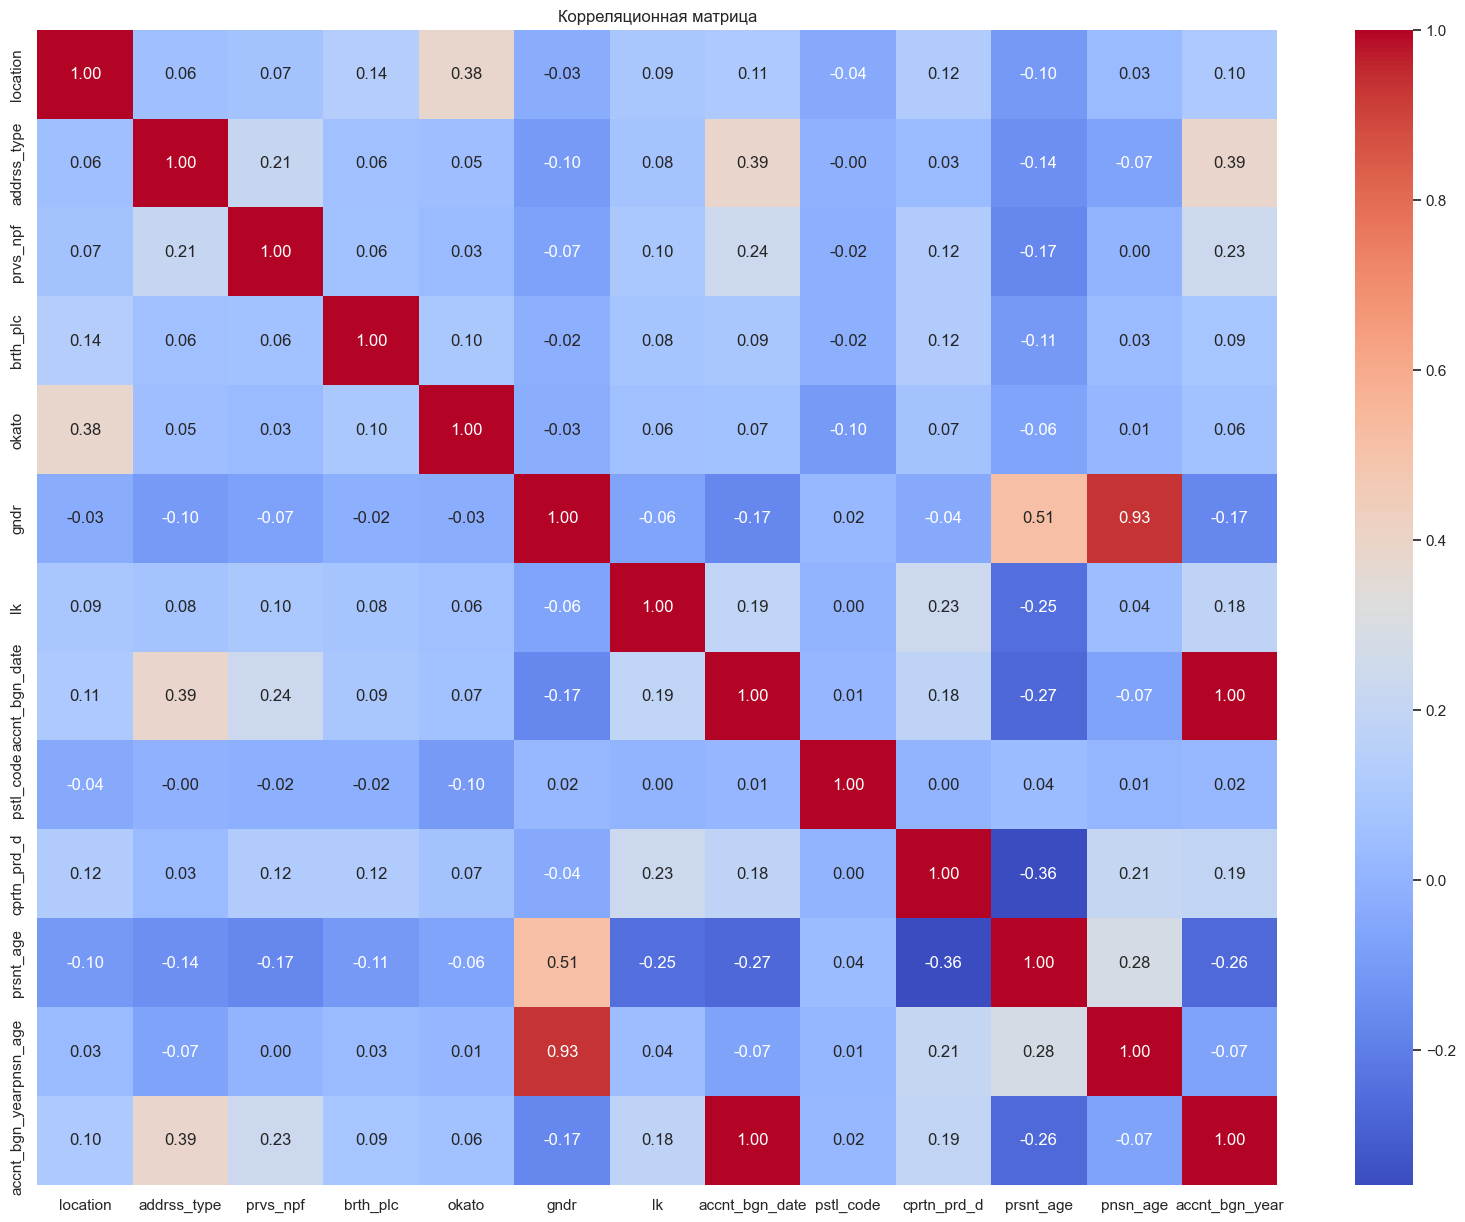

In [154]:
# Этап 8: Создание корреляционной матрицы и её визуализация
df_numeric = df_final.drop(columns=[target])  # Удаляем целевую переменную для корреляции
plt.figure(figsize=(20, 15))
corr_matrix = df_numeric.corr()
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [155]:
# Этап 9: Генерация отчета с помощью ydata-profiling
profile = ProfileReport(df_final, title='Pandas Profiling Report', explorative=True)
profile.to_file("output_report.html")  # Сохраните отчет в HTML


c:\python\lib\site-packages\ydata_profiling\profile_report.py:357: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [156]:
# Обучение моделей
X = df_final.drop(columns=[target])
y = df_final[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
# 1. Подготовка данных для CatBoost
X_train_catboost = X_train.copy()
X_test_catboost = X_test.copy()
for col in ['location', 'addrss_type', 'prvs_npf', 'brth_plc', 'okato',"gndr", "lk",'accnt_bgn_date', 'pstl_code', 'cprtn_prd_d', 'prsnt_age', 'pnsn_age']:
    X_train_catboost[col] = X_train_catboost[col].astype(str)
    X_test_catboost[col] = X_test_catboost[col].astype(str)


In [160]:
# 2. Подготовка данных для других моделей с числовым кодированием категориальных признаков
encoder = CatBoostEncoder(cols=['location', 'addrss_type', 'prvs_npf', 'brth_plc', 'okato'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)


In [161]:
# Функция для оценки модели
def evaluate_model(y_test, y_pred, y_pred_proba, model_name):
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    gini = 2 * roc_auc - 1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"F1: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"Gini: {gini:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


In [168]:
# 1. CatBoost
model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, cat_features=['location', 'addrss_type', 'prvs_npf', 'brth_plc', 'okato',"gndr", "lk",'accnt_bgn_date', 'pstl_code', 'cprtn_prd_d', 'prsnt_age', 'pnsn_age'], loss_function='Logloss', verbose=False)
model_catboost.fit(X_train_catboost, y_train)
y_pred_catboost = model_catboost.predict(X_test_catboost)
y_pred_proba_catboost = model_catboost.predict_proba(X_test_catboost)[:, 1]
evaluate_model(y_test, y_pred_catboost, y_pred_proba_catboost, "CatBoost")



--- CatBoost ---
F1: 1.00
ROC AUC: 1.00
Gini: 1.00
Precision: 1.00
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102678
           1       1.00      0.99      1.00      3887

    accuracy                           1.00    106565
   macro avg       1.00      1.00      1.00    106565
weighted avg       1.00      1.00      1.00    106565


In [164]:
# 2. LightGBM
model_lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6)
model_lgbm.fit(X_train_encoded, y_train)
y_pred_lgbm = model_lgbm.predict(X_test_encoded)
y_pred_proba_lgbm = model_lgbm.predict_proba(X_test_encoded)[:, 1]
evaluate_model(y_test, y_pred_lgbm, y_pred_proba_lgbm, "LightGBM")


c:\python\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\python\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\python\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\python\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\python\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Number of positive: 15490, number of negative: 410770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 426260, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036339 -> initscore=-3.277839
[LightGBM] [Info] Start training from score -3.277839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [165]:
# 3. XGBoost
model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_encoded, y_train)
y_pred_xgb = model_xgb.predict(X_test_encoded)
y_pred_proba_xgb = model_xgb.predict_proba(X_test_encoded)[:, 1]
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost")


c:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [01:36:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
F1: 1.00
ROC AUC: 1.00
Gini: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102678
           1       1.00      1.00      1.00      3887

    accuracy                           1.00    106565
   macro avg       1.00      1.00      1.00    106565
weighted avg       1.00      1.00      1.00    106565


In [166]:
# 4. Decision Tree
model_tree = DecisionTreeClassifier(max_depth=6, random_state=42)
model_tree.fit(X_train_encoded, y_train)
y_pred_tree = model_tree.predict(X_test_encoded)
y_pred_proba_tree = model_tree.predict_proba(X_test_encoded)[:, 1]
evaluate_model(y_test, y_pred_tree, y_pred_proba_tree, "Decision Tree")



--- Decision Tree ---
F1: 1.00
ROC AUC: 1.00
Gini: 1.00
Precision: 1.00
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102678
           1       1.00      0.99      1.00      3887

    accuracy                           1.00    106565
   macro avg       1.00      1.00      1.00    106565
weighted avg       1.00      1.00      1.00    106565


In [171]:
# Определение параметров и модели
params = {
    'iterations': [100, 1000],
    'depth': [3,4, 6, 8,10],
    'learning_rate': [0.01,0.05, 0.1, 0.2],
    'loss_function': ['Logloss']
}

# Определение категориальных признаков
cat_features = [X_train.columns.get_loc(col) for col in categorical_columns if col in X_train.columns]

# Создание и обучение модели
model = CatBoostClassifier(cat_features=categorical_columns)

# Обучение модели с использованием GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Выбор и обучение лучшей модели с оптимальными параметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
# Сначала добавляем accnt_id в X
X = df[categorical_columns + binary_columns + additional_columns + ['accnt_id']]


In [ ]:
# 1. CatBoost
y_pred_catboost = model_catboost.predict(X_test_catboost)
y_pred_proba_catboost = model_catboost.predict_proba(X_test_catboost)[:, 1]
evaluate_model(y_test, y_pred_catboost, y_pred_proba_catboost, "CatBoost")


In [ ]:
# 2. LightGBM
y_pred_lgbm = model_lgbm.predict(X_test_encoded)
y_pred_proba_lgbm = model_lgbm.predict_proba(X_test_encoded)[:, 1]
evaluate_model(y_test, y_pred_lgbm, y_pred_proba_lgbm, "LightGBM")


In [ ]:
# 3. XGBoost
y_pred_xgb = model_xgb.predict(X_test_encoded)
y_pred_proba_xgb = model_xgb.predict_proba(X_test_encoded)[:, 1]
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost")


In [ ]:
# 4. Decision Tree
y_pred_tree = model_tree.predict(X_test_encoded)
y_pred_proba_tree = model_tree.predict_proba(X_test_encoded)[:, 1]
evaluate_model(y_test, y_pred_tree, y_pred_proba_tree, "Decision Tree")


In [172]:
submission = pd.DataFrame({
    'accnt_id': X_test['accnt_id'],  # Предполагается, что этот столбец присутствует
    'erly_pnsn_flg': y_pred_catboost  # Предсказанные значения
})
# Сохраняем в CSV
submission.to_csv('submission.csv', index=False)

SyntaxError: invalid syntax (1864819846.py, line 1)

# Приложение

## EDA анализ


In [92]:

# Этап 2: Проверка наличия столбца 'client_id'
if 'accnt_id' not in df.columns:
    raise KeyError("Столбец 'client_id' не найден в DataFrame.")

# Этап 3: Проверка на дубликаты по client_id
duplicate_rows = df[df.duplicated(['accnt_id'], keep=False)]  # Получаем все дубликаты по client_id

# Этап 4: Вывод результатов
if not duplicate_rows.empty:
    print("Найдены дубликаты по 'client_id':")
    print(duplicate_rows)
else:
    print("Дубликаты по 'client_id' не найдены.")


Дубликаты по 'client_id' не найдены.


In [164]:
addrs_counts = df['addrss_type'].value_counts().sort_index()
print(addrs_counts)


addrss_type
Адрес для информирования       256
Адрес за пределами РФ            3
Адрес места жительства      437883
Адрес по прописке            94683
Name: count, dtype: int64


In [219]:
# Фильтрация строк
filtered_rows = df[df['addrss_type'] == 'Адрес за пределами РФ']

# Указание колонок для вывода
columns_to_display = ["rgn", "dstrct", "city", "sttlmnt","erly_pnsn_flg","accnt_bgn_date",]

# Вывод результата
result = filtered_rows[columns_to_display]
print (result)

                           rgn           dstrct         city sttlmnt  \
191792                БЕЛАРУСЬ              NaN    ВОЛКОВЫСК     NaN   
430614           СЕВАСТОПОЛЬ Г  МОГИЛЕВСКИЙ Р-Н    МОГИЛЕВ Г     NaN   
518830  ДОНЕЦКАЯ НАРОДНАЯ РЕСП              NaN  ГОРЛОВКА Г.     NaN   

        erly_pnsn_flg accnt_bgn_date  
191792              0     2011-09-27  
430614              0     2007-09-28  
518830              0     2006-11-02  


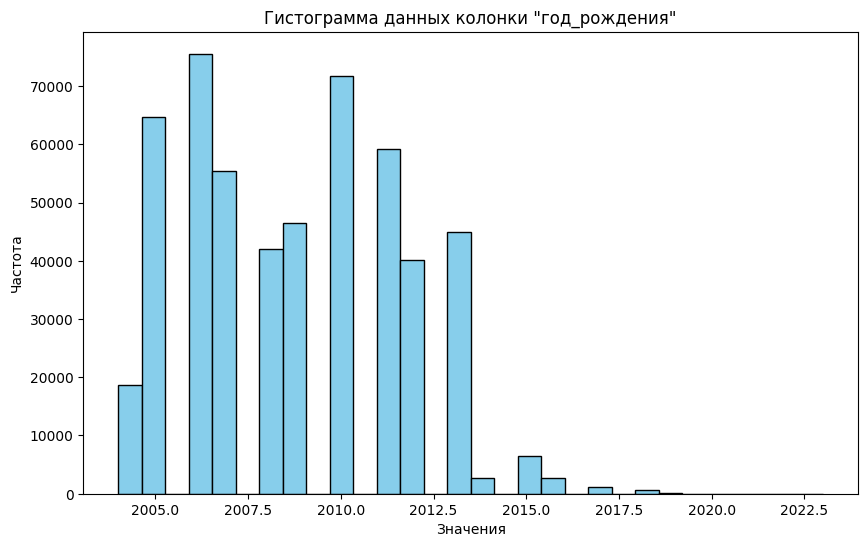

In [240]:
# Построение гистограммы для колонки 'год_рождения'
plt.figure(figsize=(10, 6))
df['year'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма данных колонки "год_создания лк"')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()
